# Carga de datos
En esta parte se realiza la carga de datos

In [1]:
!git clone https://github.com/ant-research/cvpr2020-plant-pathology.git

Cloning into 'cvpr2020-plant-pathology'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 50 (delta 6), reused 5 (delta 5), pack-reused 39
Unpacking objects: 100% (50/50), 8.86 MiB | 13.18 MiB/s, done.


In [2]:
import json
import requests
import os
import shutil
import time
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [3]:
data = pd.read_csv('/content/cvpr2020-plant-pathology/data/train.csv', delimiter=",")
data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


# Analisis de la informacion
En esta parte se realiza el  analisis basico de la informacion

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [5]:
data.describe()

,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


# Conteo y duplicados
En esta parte se realiza la revision de los campos de acuerdo a la caracteristica principall y su revision de duplicados

<BarContainer object of 2 artists>

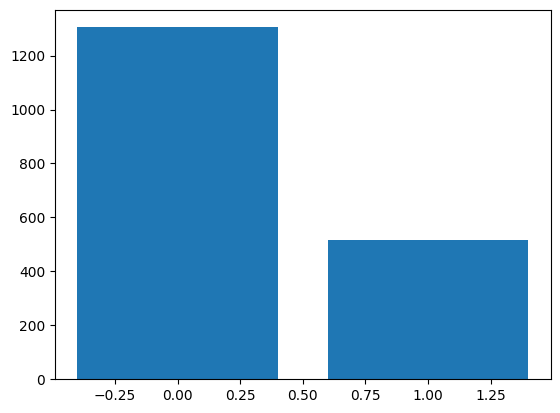

In [6]:
import matplotlib.pyplot as plt

conteo = data['healthy'].value_counts()
plt.bar(conteo.index, conteo.values)

In [7]:
conteo

0    1305
1     516
Name: healthy, dtype: int64

In [9]:
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,image_id,healthy,multiple_diseases,rust,scab


# Comparacion de campos
En esta parte del script se realiza la comparacion de los campos para ver que no existe similitud entre ellos.

In [10]:
data.nunique()

image_id             1821
healthy                 2
multiple_diseases       2
rust                    2
scab                    2
dtype: int64

<BarContainer object of 2 artists>

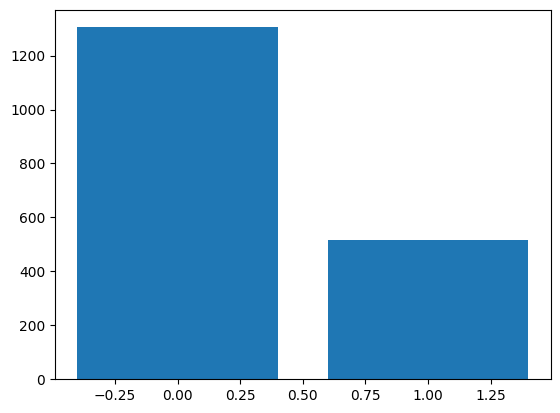

In [14]:
conteo_valores = data['healthy'].value_counts()

plt.bar(conteo_valores.index, conteo_valores.values)

<BarContainer object of 2 artists>

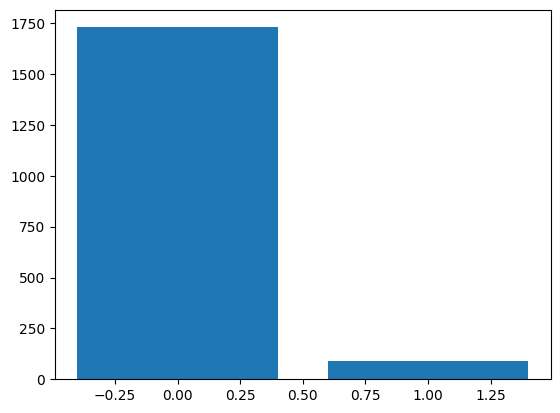

In [15]:
conteo_valores = data['multiple_diseases'].value_counts()

plt.bar(conteo_valores.index, conteo_valores.values)

<BarContainer object of 2 artists>

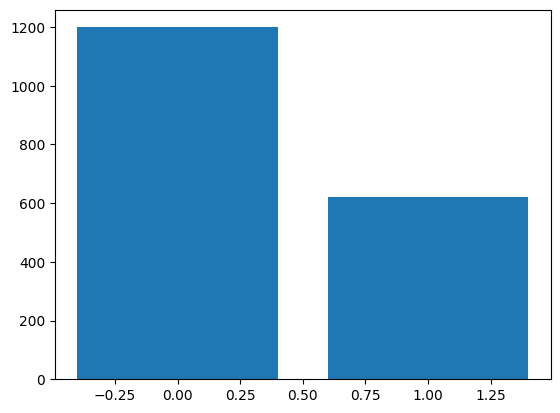

In [16]:
conteo_valores = data['rust'].value_counts()

plt.bar(conteo_valores.index, conteo_valores.values)

<BarContainer object of 2 artists>

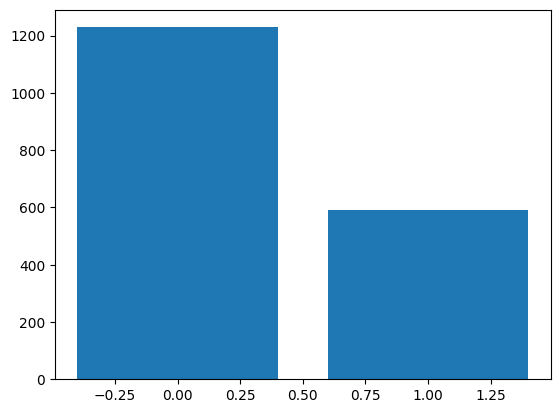

In [17]:
conteo_valores = data['scab'].value_counts()

plt.bar(conteo_valores.index, conteo_valores.values)

#Analisis PCA
Por medio de esta parte del script realizo el analisis PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
df = data.drop('image_id', axis=1)

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

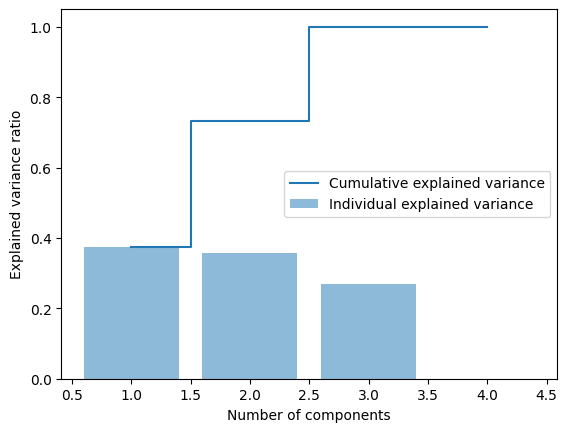

In [22]:
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

#Limpieza de datos
En esta parte del script se realiza la revision de registros duplicados o de valores atipicos.

In [23]:
data.isnull().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

umbral = 100000

valores_atipicos = ((data < (Q1 - umbral * IQR)) | (data > (Q3 + umbral * IQR))).any(axis=1)

df_atipicos = data[valores_atipicos]

<ipython-input-24-78f64d378695>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-24-78f64d378695>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-24-78f64d378695>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  valores_atipicos = ((data < (Q1 - umbral * IQR)) | (data > (Q3 + umbral * IQR))).any(axis=1)


In [25]:
df_atipicos

,image_id,healthy,multiple_diseases,rust,scab
1,Train_1,0,1,0,0
6,Train_6,0,1,0,0
25,Train_25,0,1,0,0
36,Train_36,0,1,0,0
62,Train_62,0,1,0,0
...,...,...,...,...,...
1708,Train_1708,0,1,0,0
1779,Train_1779,0,1,0,0
1780,Train_1780,0,1,0,0
1784,Train_1784,0,1,0,0
